# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('09-x_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('09-x_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('09-y_train-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('09-y_test-IEMOCAP_RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)


# **BALANCEO DE DATOS**

In [3]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
overs = RandomOverSampler()

In [5]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [6]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,2
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **NORMALIZACION DE CARACTERISTICAS**

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [8]:
x_train_std

array([[-0.02241225,  0.54494012, -0.12413973, ..., -0.48274103,
        -0.13635439,  0.27288177],
       [-0.67655445, -0.88404825,  0.86530345, ...,  0.22465898,
         0.21006793, -0.19070087],
       [-0.81635688, -0.31181082,  0.29676265, ..., -0.99365189,
        -0.57046461, -0.25447962],
       ...,
       [-0.69871285, -0.64914922, -0.02018261, ..., -0.74639543,
         0.86084365,  0.14790706],
       [-0.7674134 , -1.54669882,  1.1783046 , ..., -1.6767094 ,
        -1.38123191, -0.24652461],
       [-0.6388528 ,  0.61535054, -0.05148775, ..., -0.46516942,
         0.44516196,  0.18493958]])

In [9]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,2
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **MODELO DE MARCHINE LEARNING**

In [10]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13312     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 83,236
Trainable params: 83,236
Non-trainable params: 0
_________________________________________________________________


In [11]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_t_overs)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I

Epoch 1/800
118/118 [==============================] - 1s 4ms/step - loss: 0.9947 - accuracy: 0.5592
Epoch 2/800
118/118 [==============================] - 0s 3ms/step - loss: 0.8530 - accuracy: 0.6383
Epoch 3/800
118/118 [==============================] - 0s 4ms/step - loss: 0.7937 - accuracy: 0.6677
Epoch 4/800
118/118 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.6988
Epoch 5/800
118/118 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.7365
Epoch 6/800
118/118 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.7654
Epoch 7/800
118/118 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7935
Epoch 8/800
118/118 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8264
Epoch 9/800
118/118 [==============================] - 0s 3ms/step - loss: 0.4237 - accuracy: 0.8402
Epoch 10/800
118/118 [==============================] - 0s 3ms/step - loss: 0.3909 - accura

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 1,
       2, 2, 3, 0, 2, 2, 2, 0, 1, 1, 1, 2, 3, 1, 2, 0, 2, 3, 1, 0, 2, 3,
       2, 1, 3, 3, 0, 2, 2, 1, 2, 3, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 3, 0, 2, 3, 0, 3, 2, 1, 0, 3, 1, 2, 1, 1, 3, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 3, 2, 1, 3,
       0, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 3, 2, 1, 3,
       0, 3, 2, 3, 3, 1, 3, 1, 0, 3, 3, 3, 2, 0, 2, 0, 3, 2, 3, 0, 2, 3,
       3, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2, 1, 3, 1, 0, 3, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 3, 3, 0, 3, 2, 1, 3, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 3, 1, 1, 1, 3, 2, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 2, 2,
       0, 2, 3, 2, 2, 2, 2, 3, 0, 1, 0, 2, 3, 2, 3, 3, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 3, 2, 0, 3, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 3, 2, 3, 0,
       1, 0, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 0, 2, 0, 2, 2, 3, 3, 3, 1,
       0, 2, 3, 1, 3, 2, 1, 2, 2, 0, 3, 2, 0, 3, 0,

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        81
           1       0.43      0.38      0.40        97
           2       0.69      0.68      0.68       241
           3       0.67      0.70      0.69       160

    accuracy                           0.64       579
   macro avg       0.61      0.61      0.61       579
weighted avg       0.63      0.64      0.63       579



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        81
           1       0.43      0.38      0.40        97
           2       0.69      0.68      0.68       241
           3       0.67      0.70      0.69       160

    accuracy                           0.64       579
   macro avg       0.61      0.61      0.61       579
weighted avg       0.63      0.64      0.63       579

Matriz de confusión, sin normalización
[[ 56  11  10   4]
 [ 20  37  30  10]
 [ 11  26 164  40]
 [  2  12  34 112]]


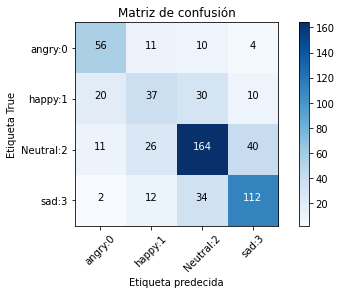

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')